In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances as pairwise_distances
from scipy.special import logsumexp


In [27]:
## This is epically slow for large data set. 
#  Consider implementing k-nearest neighbor approach for calculating diffusion map.
class diffusion_map():
    
    def __init__(self):
        return 
        
    def choose_epsilon(self, distance_matrix):
        # implementatoi from eric thiede 
        # reference: T. Berry, D. Giannakis, and J. Harlim, Physical Review E 91, 032915  (2015).
        epsilons = 2**np.arange(-40., 41., 1.)
        log_T = [logsumexp((-1*distance_matrix**2)/(4. * eps)) for eps in epsilons]
        log_eps = np.log(epsilons)
        log_deriv = np.diff(log_T)/np.diff(log_eps)
        max_loc = np.argmax(log_deriv)
        epsilon = np.exp(log_eps[max_loc])
        return epsilon
        
    def build_diffusion_map(self,traj,k,alpha=0,h=1,epsilon='bgh',power_m=1):
        # reference: https://en.wikipedia.org/wiki/Diffusion_map
        # np.shape(traj) = (number_of_data_points, number_of_collective_variables)
        distance_matrix=pairwise_distances(traj)
        if epsilon=='bgh':
            epsilon=self.choose_epsilon(distance_matrix)
        elif epsilon=='bgh_generous':
            epsilon=self.choose_epsilon(distance_matrix)**2
        k_epsilon=h*np.exp(-(distance_matrix**2)/(epsilon))
        diagonal_matrix=np.diag(np.sum(k_epsilon,axis=1)**(-1*alpha))
        
        k_alpha_epsilon=diagonal_matrix .dot(k_epsilon) .dot(diagonal_matrix)
        diagonal_matrix_alpha=np.diag(np.sum(k_alpha_epsilon,axis=1)**(-1))
        
        p_matrix=(diagonal_matrix_alpha .dot(k_alpha_epsilon))**power_m
        L=(p_matrix-np.identity(np.shape(p_matrix)[0]))* 1/epsilon
        
        eigensystem=np.linalg.eig(L)
        eigenvalues=eigensystem[0]
        sort_index=eigenvalues.real.argsort()[::-1][1:] #sort eigenvalues in descending order 
        eigenvalues=eigenvalues.real[sort_index]
        eigenvectors=eigensystem[1].real[:,sort_index]
        diffusion_map=eigenvectors[:,0:k] .dot(np.diag(np.sqrt(-1*eigenvalues[0:k])))
        self.diffusion_map=diffusion_map.T
        #print(eigenvalues)
        return self
        
 
        

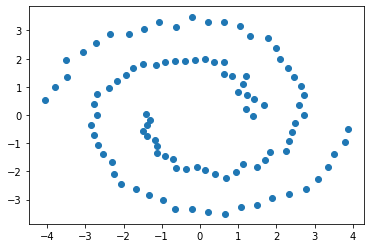

In [8]:
# testcase 1: spiral
import matplotlib.pyplot as plt
data=np.loadtxt('spiral.txt')
plt.scatter(data[:,0],data[:,1])

In [28]:
x=diffusion_map().build_diffusion_map(data,k=2,alpha=0,epsilon='bgh',power_m=1)

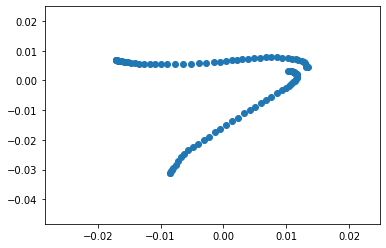

In [29]:
plt.scatter(x.diffusion_map[0],x.diffusion_map[1])

In [33]:
# test case 2: swiss_roll 
# set parameters
length_phi = 15   #length of swiss roll in angular direction
length_Z = 15     #length of swiss roll in z direction
sigma = 0.1       #noise strength
m = 10000         #number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
Z = length_Z*np.random.rand(m)
X = 1./6*(phi + sigma*xi)*np.sin(phi)
Y = 1./6*(phi + sigma*xi)*np.cos(phi)

swiss_roll = np.array([X, Y, Z]).transpose()

# check that we have the right shape
print(swiss_roll.shape)



(10000, 3)


In [34]:
x=diffusion_map().build_diffusion_map(swiss_roll,k=2,alpha=0,epsilon='bgh',power_m=1)

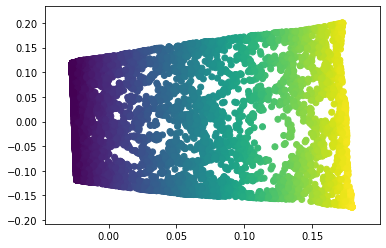

In [53]:
from mpl_toolkits import mplot3d

plt.scatter(x.diffusion_map[0]*100,x.diffusion_map[1]*100,c=x.diffusion_map[0])


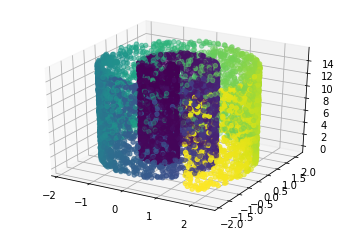

In [52]:
ax=plt.axes(projection='3d')
ax.scatter(swiss_roll[:,0],swiss_roll[:,1], swiss_roll[:,2],c=x.diffusion_map[0])

In [63]:
class DGA():
    #reference: DGA paper
    def __init__(self):
        return 
    
    def construct_dmap_basis(self,k=64,alpha=0,epsilon='bgh'):
        self.basis=diffusion_map().build_diffusion_map(data,k=k,alpha=alpha,epsilon=epsilon,power_m=1)
        return self.basis
    
    def build_guess_function(self,h): # solve equation 58 and 59 in the reference 
        return 
        
    

2